<a href="https://colab.research.google.com/github/Yusufadepoju/Heart-Disease-Prediction-Analysis-and-Model/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import  neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Attribute Information
1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal]


Statistical summary of the data

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


checking the null value in the data

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data exploration

Distribution of Heart Disease by Sex

In [ ]:
df.groupby('HeartDisease')['Sex'].value_counts()

HeartDisease  Sex
0             M      267
              F      143
1             M      458
              F       50
Name: Sex, dtype: int64

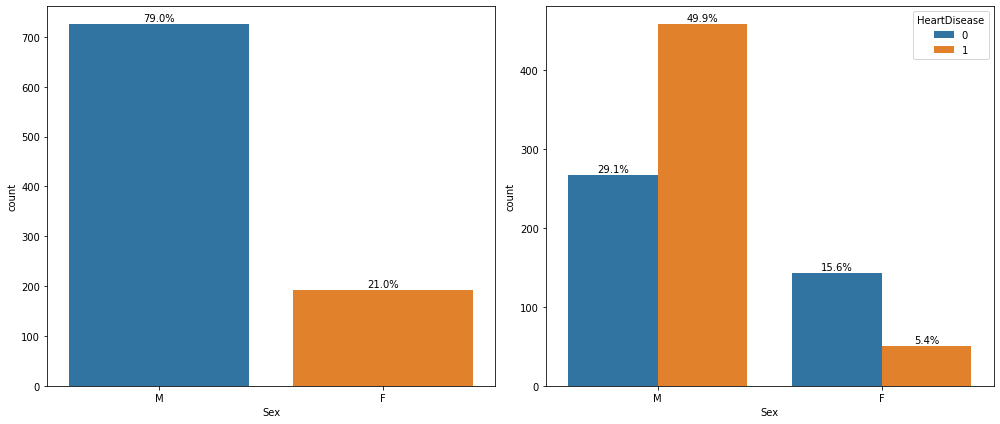

In [ ]:


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
sns.countplot(data=df, x='Sex', ax=ax1)


total = len(df)
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')

sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=ax2)

total = len(df)
for p in ax2.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

***`[Insight]`***

---

From the above diagram, the dataset captured more information about male than female therefore the there is a diffrence of 44% in  male to female ratio who are heart disease posiitive

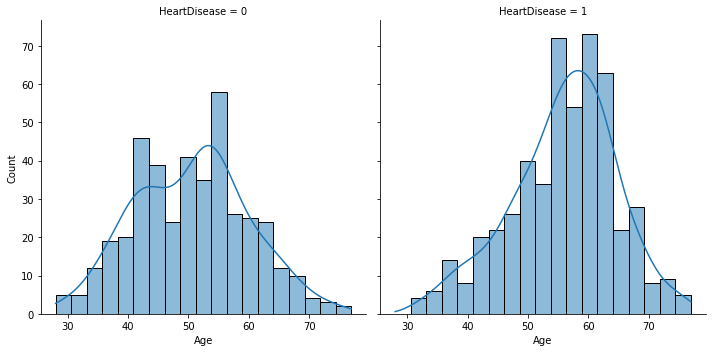

In [ ]:
sns.displot(df, x="Age", col="HeartDisease", kde = True)


Text(0.5, 1.0, 'Age Distribution')

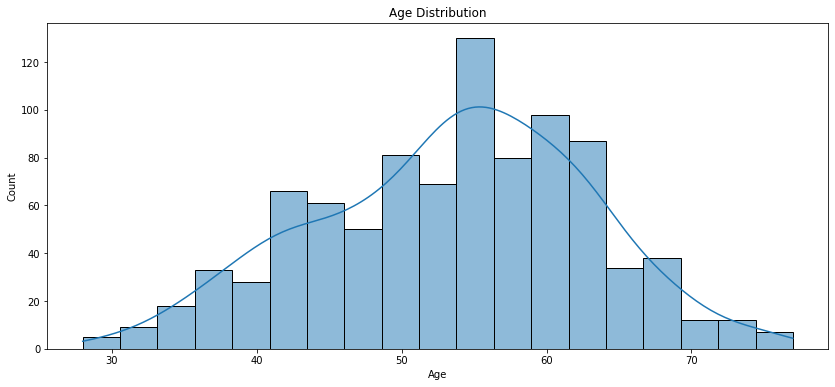

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['Age'], kde = True)
plt.title('Age Distribution')

In [ ]:

df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


Distribution of Chest Pain Type

In [ ]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

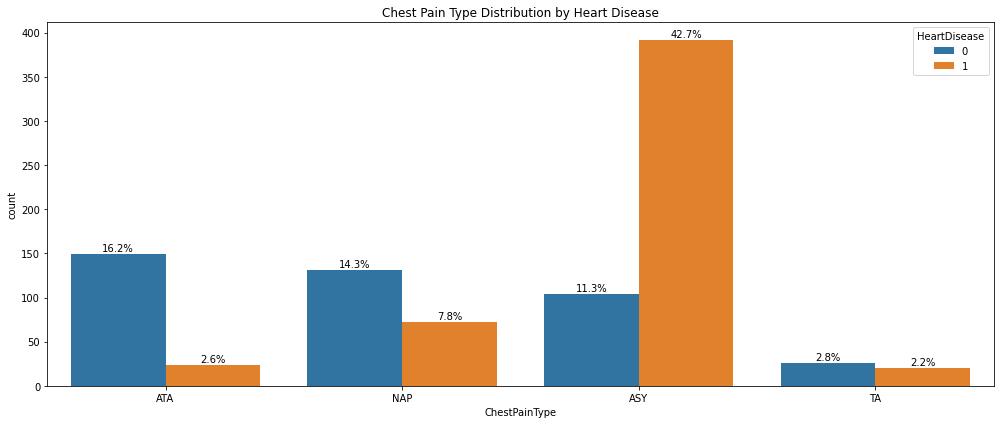

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Chest Pain Type Distribution by Heart Disease')


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

***`Insight`***

---


Majority of the asymptomatic chest pain are heart disease positive which implies that asymptomatic chest pain type could be a be better predective feature heart prediction model. 

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<Figure size 1008x432 with 0 Axes>

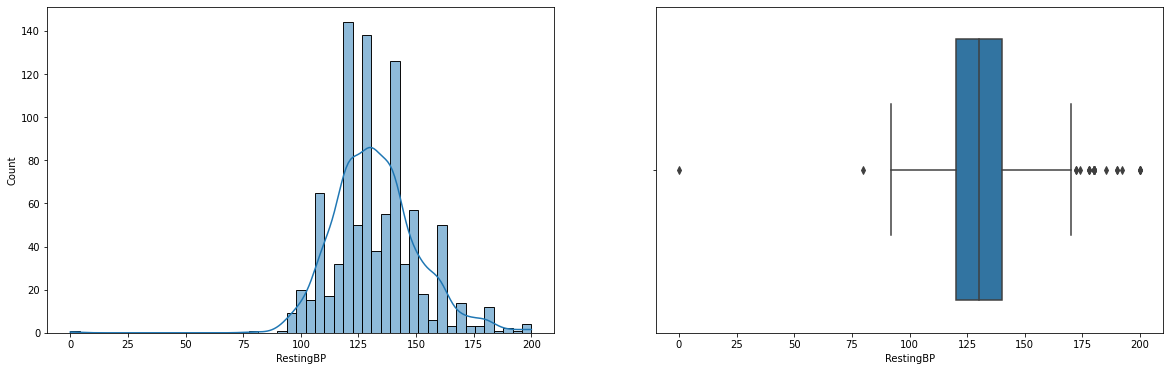

In [ ]:
plt.figure(figsize=(14,6))


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

sns.histplot(data = df['RestingBP'], kde = True, ax=ax1)
sns.boxplot(x = 'RestingBP', data = df,  ax=ax2)



***`Insight`***

---


The data is a little bit skew to the left side which implies that the median of the valur is a little bit greater than the mean also, there exist an outliers at the extreme end of the left side

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


Text(0.5, 1.0, 'Cholesterol')

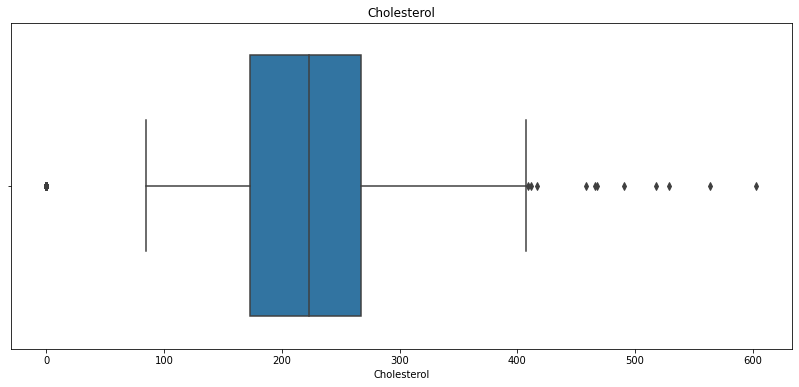

In [ ]:
plt.figure(figsize=(14,6))


sns.boxplot(x = 'Cholesterol', data = df)
plt.title('Cholesterol')

There exist an outliers at the extreme end on both sides


In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


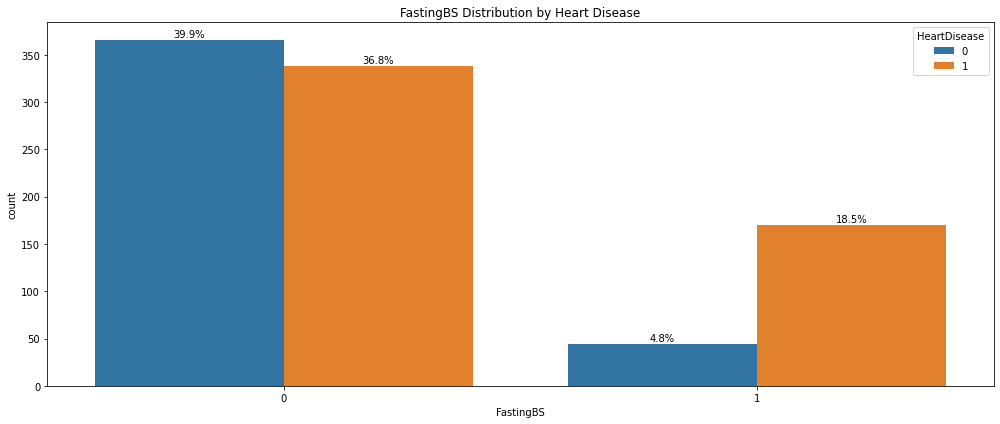

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='FastingBS', hue='HeartDisease')
plt.title('FastingBS Distribution by Heart Disease')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

 ***`[Insights]`***

---



There is no significant diffrence (3%) between observers that are positive and negativity to heart disease whose fasting blood pressure are less than 120mmHg.

Generally most people with fasting BP greater than 120mmHg are not prone to Heart disease in comparism with those with below 120mmHg fasting BP

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


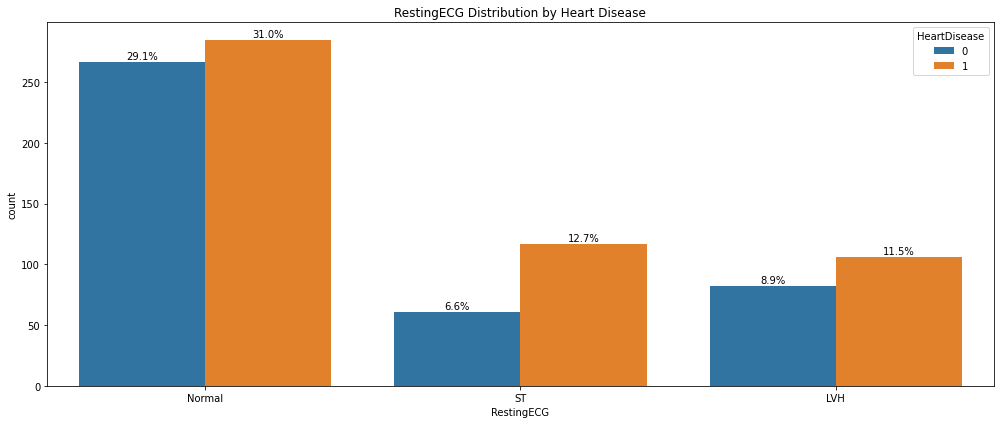

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='RestingECG', hue='HeartDisease')
plt.title('RestingECG Distribution by Heart Disease')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

***Insight***


---


Observers with normal resting ECG are mostly with heart disease when compared with ST Aand LVH resting ecg type

In [ ]:

df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


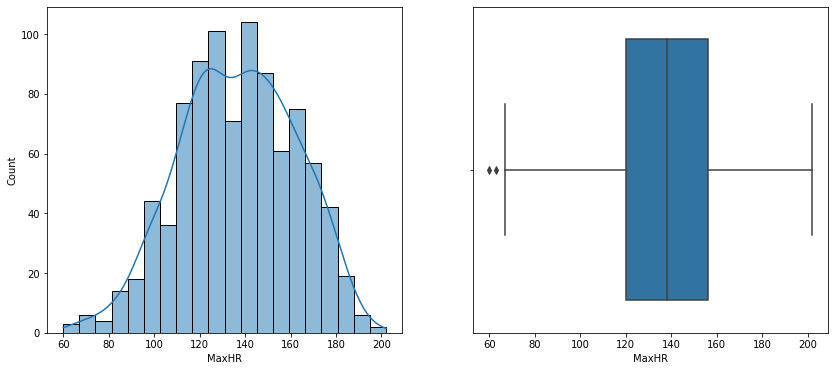

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.histplot(data = df['MaxHR'], kde = True, ax=ax1)
sns.boxplot(x = 'MaxHR', data = df,  ax=ax2)
#sns.countplot(data=df, x='MaxHR', y='HeartDisease')


***`Insight`***

---


The data is a little bit skew to the left side which implies that the median of the valur is a little bit greater than the mean also, there exist an outliers at the extreme end of the left side

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<ipython-input-25-97c901b41b23>:3: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="top right");


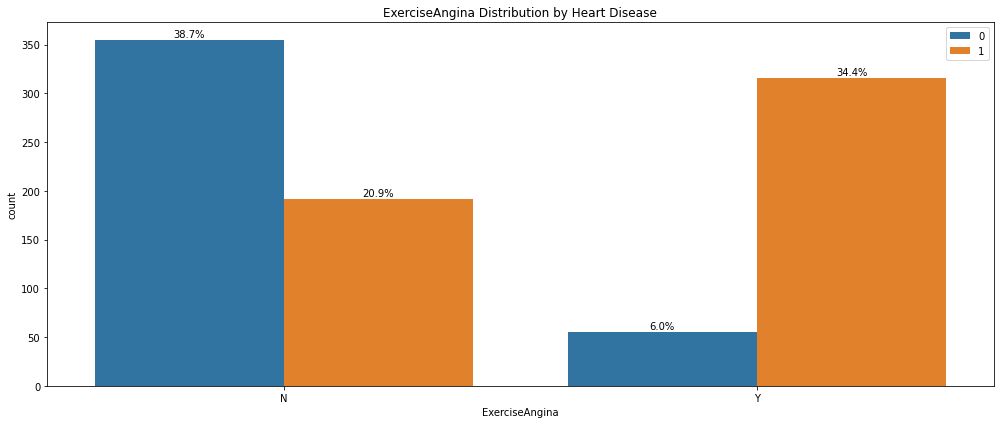

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease');
plt.legend(loc="top right");
plt.title('ExerciseAngina Distribution by Heart Disease')


total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

***`Insight`***

---

Mosy that that are positive to exercise angania are also prone heart disease than without excercise angania

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


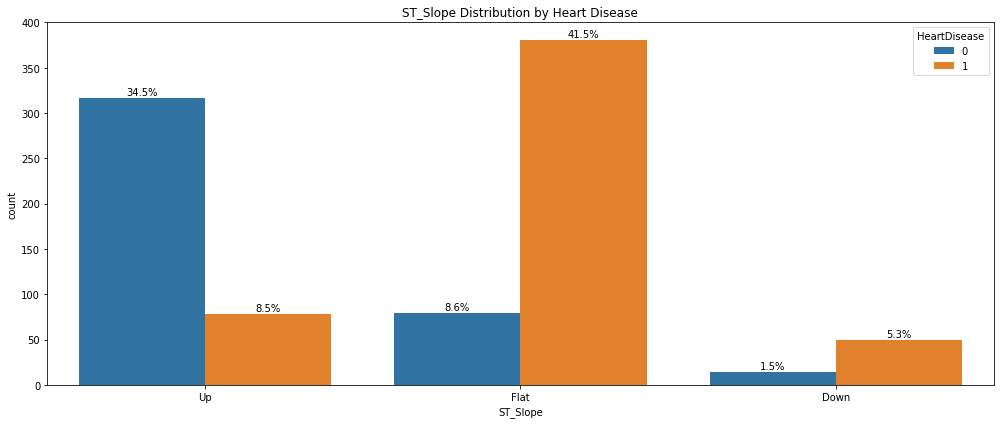

In [ ]:

plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
plt.title('ST_Slope Distribution by Heart Disease')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

*Insighs*

---

Most obsevers from flat ST_slope type are in Positive class of Heart Disease which implies that ST_slope type could be a be better predective feature heart prediction model.

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [ ]:
df['Oldpeak'].head(10)

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
5    0.0
6    0.0
7    0.0
8    1.5
9    0.0
Name: Oldpeak, dtype: float64

Text(0.5, 1.0, 'Oldpeak Distribution by Heart Disease')

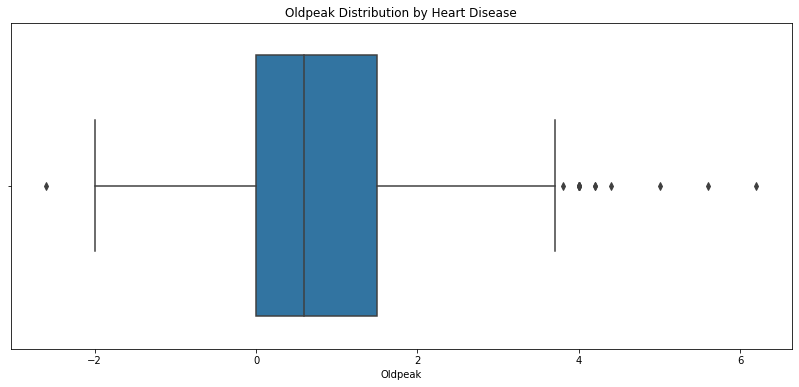

In [ ]:
plt.figure(figsize=(14,6))
sns.set_style(style=None)
sns.boxplot(data=df, x='Oldpeak',  hue='HeartDisease')
plt.title('Oldpeak Distribution by Heart Disease')

There exist an outliers at the extreme end on both sides

Data Processing

In [ ]:
low = df['RestingBP'].quantile(0.1)
high = df['RestingBP'].quantile(0.9)
mask= df['RestingBP'].between(low, high)

In [ ]:
#low, high = df['RestingBP'].quantile([0.1, 0.9])
mask = df['RestingBP'].between(low, high)

In [ ]:
df = df[mask]

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
Features = df[df.columns[:-1]]
Features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
Label = df[df.columns[-1]]
Label

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 821, dtype: int64

## Remove outliers

check for low and high cardinality colummns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             821 non-null    int64  
 1   Sex             821 non-null    object 
 2   ChestPainType   821 non-null    object 
 3   RestingBP       821 non-null    int64  
 4   Cholesterol     821 non-null    int64  
 5   FastingBS       821 non-null    int64  
 6   RestingECG      821 non-null    object 
 7   MaxHR           821 non-null    int64  
 8   ExerciseAngina  821 non-null    object 
 9   Oldpeak         821 non-null    float64
 10  ST_Slope        821 non-null    object 
 11  HeartDisease    821 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 83.4+ KB


In [ ]:
df.select_dtypes('object').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

check for multicollinearity

In [ ]:
corr = Features.select_dtypes('number').corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.258116,-0.126542,0.213594,-0.401928,0.254063
RestingBP,0.258116,1.000000,0.046929,0.080134,-0.095255,0.164454
Cholesterol,-0.126542,0.046929,1.000000,-0.230834,0.247570,0.038524
FastingBS,0.213594,0.080134,-0.230834,1.000000,-0.125026,0.065960
MaxHR,-0.401928,-0.095255,0.247570,-0.125026,1.000000,-0.171783
Oldpeak,0.254063,0.164454,0.038524,0.065960,-0.171783,1.000000


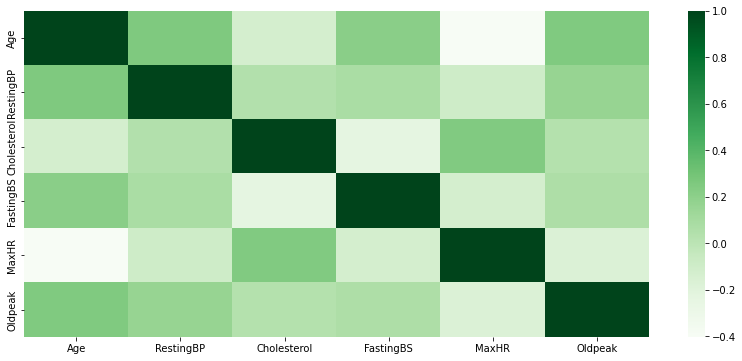

In [ ]:
#check for multicollinearity
#corr = df[numerical[:-1]].corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap='Greens')

In [ ]:
Features.drop(columns=['RestingBP', 'FastingBS', 'Oldpeak', 'Cholesterol'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.258116,-0.126542,0.213594,-0.401928,0.254063
RestingBP,0.258116,1.000000,0.046929,0.080134,-0.095255,0.164454
Cholesterol,-0.126542,0.046929,1.000000,-0.230834,0.247570,0.038524
FastingBS,0.213594,0.080134,-0.230834,1.000000,-0.125026,0.065960
MaxHR,-0.401928,-0.095255,0.247570,-0.125026,1.000000,-0.171783
Oldpeak,0.254063,0.164454,0.038524,0.065960,-0.171783,1.000000


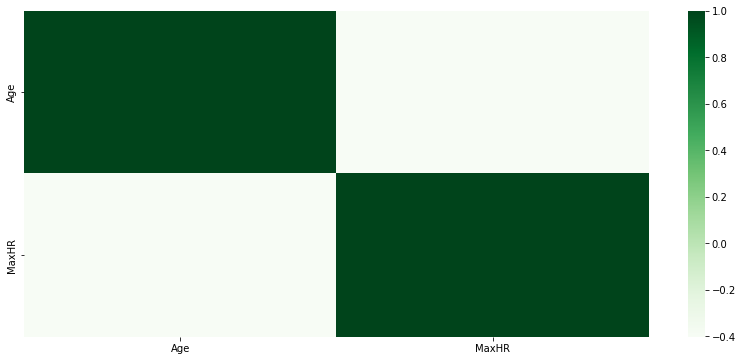

In [ ]:
#check for multicollinearity
corr = Features.select_dtypes('number').corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap='Greens')

Split data into train and test set

In [ ]:

X = Features
y = Label

In [ ]:
y = y.to_frame()

In [ ]:


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 574 rows
Test Set: 247 rows


Baseline accuracy

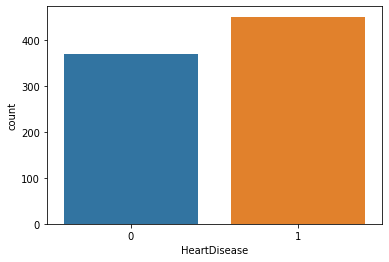

In [ ]:
sns.countplot(data=df, x='HeartDisease')

In [ ]:
round(y_train.value_counts(normalize=True).max(), 2)

0.55

In [ ]:
#Using OneHotEncoder as preprocessing
model = make_pipeline(
        OneHotEncoder(handle_unknown='ignore'),
        LogisticRegression(max_iter=1000, C=0.001, solver='liblinear')
)

model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=1000,
                                    solver='liblinear'))])

In [ ]:
predictions=model.predict(X_test)

In [ ]:
#evaluate the performance of the model
from sklearn.metrics import accuracy_score


acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))


print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.83
Test Accuracy: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[ 78  34]
 [  6 129]]


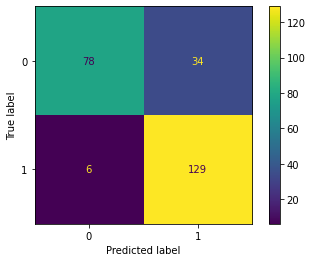

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, model.predict(X_test)))
print("Overall Recall:",recall_score(y_test, model.predict(X_test)))

Overall Precision: 0.7914110429447853
Overall Recall: 0.9555555555555556


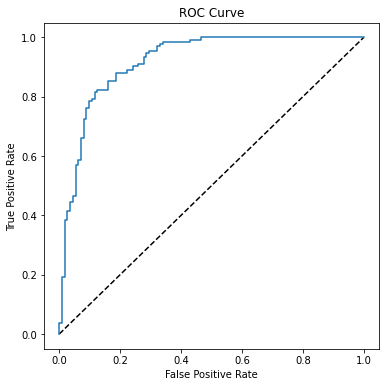

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_train_pred_proba[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_train_pred_proba[:,1])
print('AUC: ' + str(auc))

AUC: 0.919047619047619


Using Ensemble algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = make_pipeline(
        OneHotEncoder(handle_unknown='ignore'),
        RandomForestClassifier(n_estimators=100))


model1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
model1.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0])

Confusion Matrix:
 [[ 93  19]
 [ 19 116]] 

Accuracy: 0.8461538461538461
Overall Precision: 0.8592592592592593
Overall Recall: 0.8592592592592593

AUC: 0.8978505291005291


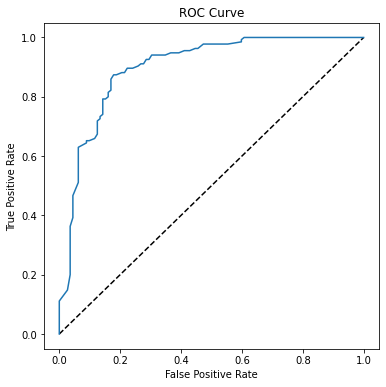

In [ ]:
predictions1 = model1.predict(X_test)
y_scores = model1.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions1)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions1))
print("Overall Precision:",precision_score(y_test, predictions1))
print("Overall Recall:",recall_score(y_test, predictions1))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

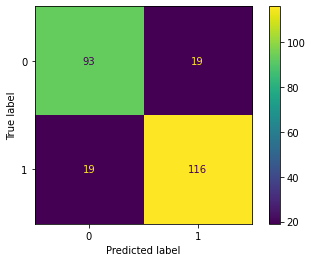

In [ ]:
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test)

In [ ]:
cv_acc_scores = cross_val_score(model1, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.85217391 0.86086957 0.86086957 0.7826087  0.85964912]


Create a dictionary for range of hyperparameters thatwe want to use

In [ ]:
params = {
    "randomforestclassifier__n_estimators": range(25, 100, 10),
    "randomforestclassifier__max_depth": range(10, 60, 10)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 10),
 'randomforestclassifier__max_depth': range(10, 60, 10)}

Performing hyperparameters tuning

In [ ]:
new_model = GridSearchCV(
    model1,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

new_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 60, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

fit the new model to the training data

In [ ]:
# Train model
new_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 60, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [ ]:
new_model.cv_results_

{'mean_fit_time': array([0.05092177, 0.06081471, 0.08082304, 0.09890838, 0.11614895,
        0.12486315, 0.14979119, 0.15860057, 0.05074773, 0.06770039,
        0.08985138, 0.1141037 , 0.11825356, 0.14084339, 0.15001321,
        0.16839714, 0.05487237, 0.06545663, 0.08653231, 0.10421996,
        0.12480555, 0.13567047, 0.15302868, 0.17655268, 0.05213995,
        0.06906285, 0.08662682, 0.10644617, 0.12081347, 0.13880196,
        0.15141954, 0.17367759, 0.05112381, 0.07267661, 0.09162178,
        0.10612421, 0.12635369, 0.13871584, 0.1577693 , 0.17179346]),
 'std_fit_time': array([0.0074859 , 0.00103785, 0.00507068, 0.00832582, 0.00592738,
        0.00132214, 0.01226661, 0.01046434, 0.0003994 , 0.00131443,
        0.0060516 , 0.01726104, 0.00257905, 0.00813024, 0.00207994,
        0.0059029 , 0.00549988, 0.00119876, 0.00171659, 0.00159481,
        0.00724052, 0.00282797, 0.00167813, 0.00556807, 0.00169536,
        0.00260161, 0.00259206, 0.00458253, 0.0019508 , 0.00404497,
        0.003

In [ ]:
cv_results = pd.DataFrame(new_model.cv_results_)

In [ ]:
mask = cv_results['param_randomforestclassifier__max_depth'] == 10
#mask

In [ ]:
cv_results[mask]['param_randomforestclassifier__max_depth']

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
Name: param_randomforestclassifier__max_depth, dtype: object

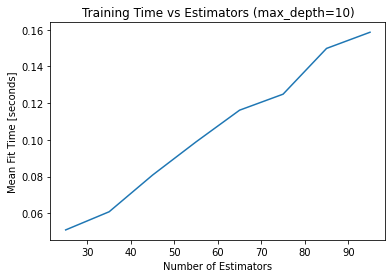

In [ ]:
mask = cv_results['param_randomforestclassifier__max_depth'] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]['param_randomforestclassifier__n_estimators'],
    cv_results[mask]['mean_fit_time']
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

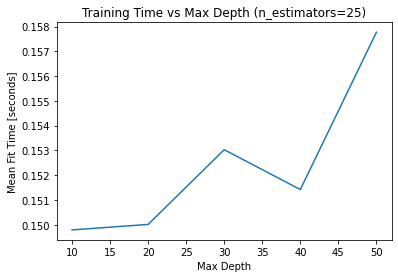

In [ ]:
#create mask
mask = cv_results['param_randomforestclassifier__n_estimators'] == 85

#plot fit time vs n_estimators
plt.plot(
    cv_results[mask]['param_randomforestclassifier__max_depth'],
    cv_results[mask]["mean_fit_time"]
)

# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [ ]:
result = new_model.fit(X_train, y_train)
best_model = result.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:

#fit the model
predictions = new_model.predict(X_train)

In [ ]:
# Extract best hyperparameters
new_model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 85}

In [ ]:
acc_train = new_model.score(X_train, y_train) 
acc_test = accuracy_score(y_test, new_model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9024
Test Accuracy: 0.8421


In [ ]:
y_test.value_counts()

HeartDisease
1               135
0               112
dtype: int64

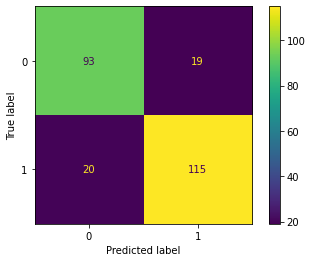

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(new_model, X_test, y_test);

## ***Communication***

Estimates using a trained model in scikit-learn

In [ ]:
y_train_pred_proba = model.predict_proba(X_test)
print(y_train_pred_proba[:5])
predictions[:5]

[[0.44444536 0.55555464]
 [0.47581709 0.52418291]
 [0.42844766 0.57155234]
 [0.42388146 0.57611854]
 [0.52130111 0.47869889]]


array([1, 1, 1, 1, 0])

Extraction of feature names and importances from the model. 

In [ ]:
Features = model.named_steps['onehotencoder'].get_feature_names_out()

In [ ]:
Features

array(['Age_28', 'Age_29', 'Age_31', 'Age_32', 'Age_33', 'Age_34',
       'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40',
       'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46',
       'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52',
       'Age_53', 'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58',
       'Age_59', 'Age_60', 'Age_61', 'Age_62', 'Age_63', 'Age_64',
       'Age_65', 'Age_66', 'Age_67', 'Age_68', 'Age_69', 'Age_70',
       'Age_71', 'Age_72', 'Age_73', 'Age_74', 'Age_76', 'Age_77',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'MaxHR_60', 'MaxHR_63',
       'MaxHR_67', 'MaxHR_71', 'MaxHR_77', 'MaxHR_78', 'MaxHR_80',
       'MaxHR_82', 'MaxHR_83', 'MaxHR_84', 'MaxHR_86', 'MaxHR_88',
       'MaxHR_90', 'MaxHR_92', 'MaxHR_93', 'MaxHR_94', 'MaxHR_95',
       'MaxHR_96', 'MaxHR_97', 'MaxHR_98', 'MaxHR_99', 'MaxHR

In [ ]:
coeff_importances = model.named_steps['logisticregression'].coef_[0]


In [ ]:

coeff_importances

array([-4.75804683e-04, -1.42247662e-03,  4.28500733e-04, -1.60538121e-05,
       -4.77277326e-04, -1.39305615e-03, -1.96797742e-03, -1.46646430e-03,
       -2.98050154e-03,  1.77379089e-03, -3.47577804e-03, -6.07784052e-04,
       -2.06500507e-03, -5.39314326e-03, -8.33337906e-04, -2.60062090e-03,
       -3.49137236e-03,  1.37461047e-03,  6.38002164e-04, -2.56434916e-04,
       -1.61442603e-03,  9.02378916e-05, -2.75407267e-04, -7.98612114e-04,
       -1.48069616e-03, -1.44983573e-03,  1.97858549e-03,  2.15762022e-03,
        3.59358384e-03,  4.93059353e-03,  1.88520520e-03,  3.98038382e-03,
        5.99816185e-03,  5.19132860e-03,  1.59596619e-03,  1.55905386e-03,
        2.46045861e-03,  1.25117385e-03,  3.12845824e-03,  9.08254004e-04,
        2.50558816e-03,  1.72779007e-03, -5.62024644e-04,  1.33548367e-03,
        5.36341198e-04,  4.48186725e-04, -5.01958326e-04,  4.65281138e-04,
       -3.11287483e-02,  4.74653401e-02,  7.51481092e-02, -3.54646300e-02,
       -2.17681227e-02, -

In [ ]:
feature_importance = pd.Series(coeff_importances, index=Features).sort_values()

Create a horizontal bar chart with the 5 largest coefficients from feature_importance. Be sure to label your x-axis "Odds Ratio".

In [ ]:
feature_importance

ST_Slope_Up         -0.073617
ExerciseAngina_N    -0.053255
ChestPainType_ATA   -0.035465
Sex_F               -0.031129
ChestPainType_NAP   -0.021768
                       ...   
RestingECG_ST        0.015706
Sex_M                0.047465
ExerciseAngina_Y     0.069592
ChestPainType_ASY    0.075148
ST_Slope_Flat        0.083070
Length: 173, dtype: float64

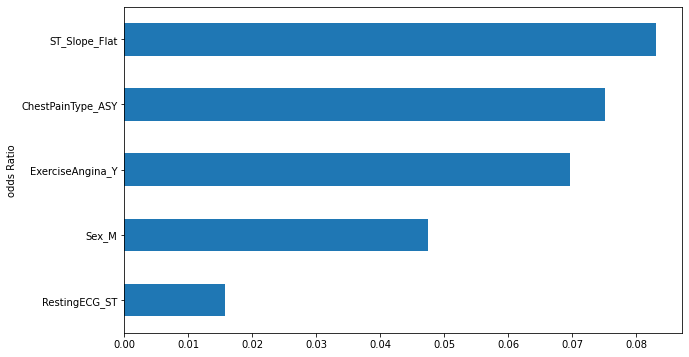

In [ ]:
plt.figure(figsize=(10,6))
feature_importance.tail().plot(kind='barh', xlabel = 'odds Ratio')
#sns.barplot(x=feature_importance[10:], y=feature_importance.index[10:], orient='h')

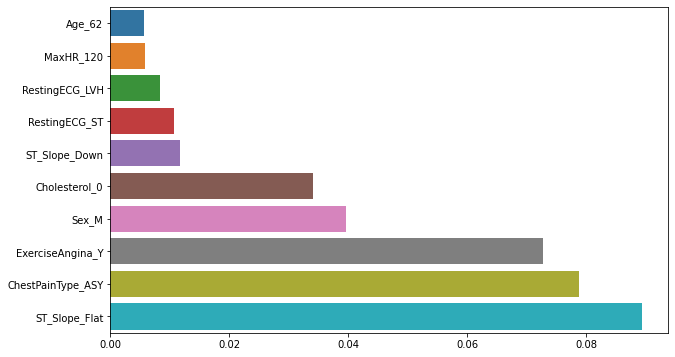

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[-10:], y=feature_importance.index[-10:], orient='h')

Using Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = make_pipeline(
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        DecisionTreeClassifier(max_depth=1, random_state=42)
)

model1.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
#evaluate the performance of the model
from sklearn.metrics import accuracy_score

acc_train = model1.score(X_train, y_train)
acc_val = accuracy_score(y_test, model1.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.82
Validation Accuracy: 0.81


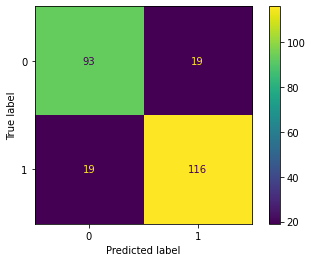

In [ ]:
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test)

In [ ]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []
depth_hyperparams = range(1, 30, 2)
for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test, y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8205574912891986, 0.8571428571428571, 0.8954703832752613]
Validation Accuracy Scores: [0.8097165991902834, 0.8299595141700404, 0.7854251012145749]


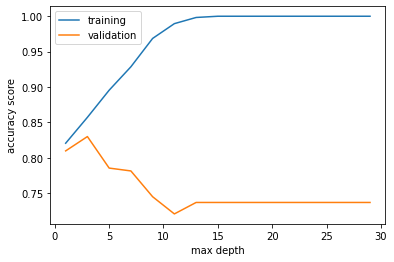

In [ ]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label='training')
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel('max depth')
plt.ylabel('accuracy score')
plt.legend()

In [ ]:
tree_depth = test_model.named_steps['decisiontreeclassifier'].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 15


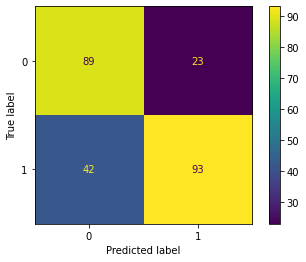

In [ ]:
ConfusionMatrixDisplay.from_estimator(test_model, X_test, y_test)

### Communication

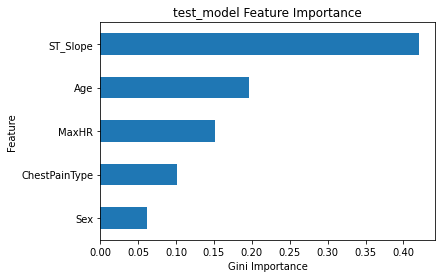

In [ ]:
# Get importances
importances = test_model.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail().plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("test_model Feature Importance");

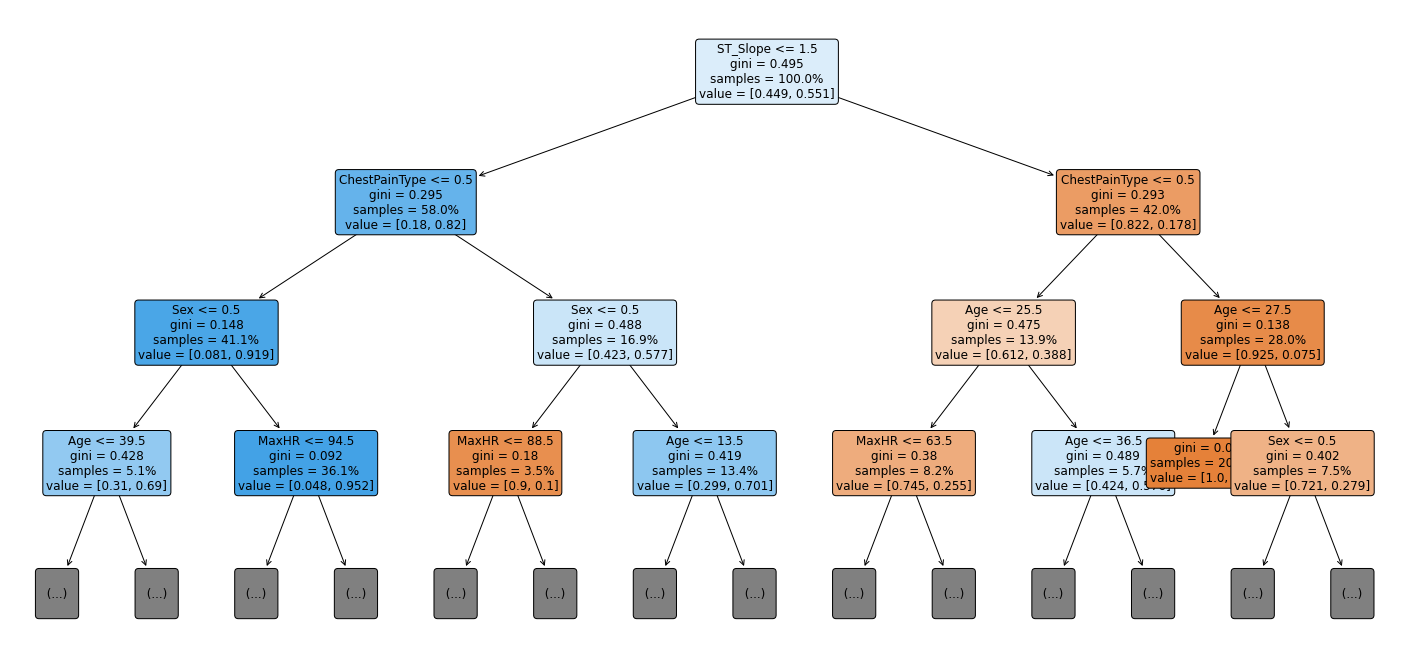

In [ ]:
1# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=test_model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [ ]:
import joblib

# Save the model as a pickle file
filename = 'Heart_model.pkl'
joblib.dump(model, filename)

['Heart_model.pkl']